In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import country_converter as coco
import warnings

In [184]:
cc = coco.CountryConverter()
historical= pd.read_csv("../resources/validation-test/historical_cross_border_flows.csv", index_col=0, parse_dates=True)

all_country = sorted(list(set([link[:2] for link in historical.columns[1:]] + [link[5:] for link in historical.columns[1:]])))

color_country = {
    'AL': '#440154',
    'AT': '#482677',
    'BA': '#43398e',
    'BE': '#3953a4',
    'BG': '#2c728e',
    'CH': '#228b8d',
    'CZ': '#1f9d8a',
    'DE': '#29af7f',
    'DK': '#3fbc73',
    'EE': '#5ec962',
    'ES': '#84d44b',
    'FI': '#addc30',
    'FR': '#d8e219',
    'GB': '#fde725',
    'GR': '#f0f921',
    'HR': '#f1c25e',
    'HU': '#f4a784',
    'IE': '#f78f98',
    'IT': '#f87ea0',
    'LT': '#f87a9a',
    'LU': '#f57694',
    'LV': '#f3758d',
    'ME': '#f37685',
    'MK': '#f37b7c',
    'NL': '#f28774',
    'NO': '#f1976b',
    'PL': '#efaa63',
    'PT': '#ebb160',
    'RO': '#e6c260',
    'RS': '#e2d75e',
    'SE': '#dedc5b',
    'SI': '#d9e35a',
    'SK': '#d3e75a'
}

In [279]:
def sort_one_country(country):
    
    
    indices = [link for link in historical.columns[1:] if country in link]
    df_hist = historical[indices].copy()
    for link in df_hist.columns:
        if country in link[5:]:
            df_hist[link] = - df_hist[link]
            link_reverse = str(link[5:] + ' - ' + link[:2])
            df_hist = df_hist.rename(columns={link:link_reverse})
    
    return df_hist

def cross_border_time_series(country):
    warnings.filterwarnings('ignore')
    
    df = sort_one_country(country)
    df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
    
    fig, ax = plt.subplots(figsize=(15,5))
    
    color = [color_country[link[5:]] for link in df.columns]
    
    df_pos.plot.area(ax=ax, stacked=True, linewidth=0., color=color)
    # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
    df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, linewidth=0., color=color)
    # rescale the y axis
    ax.set_ylim([df_neg.sum(axis=1).min(), df_pos.sum(axis=1).max()])
    
    plt.title('Import / Export for ' + cc.convert(country, to='name_short'))
    
    # Custom legend elements
    legend_elements = []
    
    for link in df.columns:
        legend_elements = legend_elements + [plt.fill_between([], [], color=color_country[link[5:]], label=cc.convert(link[5:], to='name_short'))]

    # Create the legend
    plt.legend(handles=legend_elements, loc='upper right')
    
    warnings.filterwarnings('default')
        
def cross_border_bar():
    
    df_positive = pd.DataFrame()
    df_negative = pd.DataFrame()
    color = []
    
    for country in all_country:
        df = sort_one_country(country)
        df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
        
        color = color + [color_country[link[5:]] for link in df.columns]
        
        df_positive = pd.concat([df_positive,pd.DataFrame(data=df_pos.sum()).T.rename({0:cc.convert(country, to='name_short')})])
        df_negative = pd.concat([df_negative,pd.DataFrame(data=df_neg.sum()).T.rename({0:cc.convert(country, to='name_short')})])
        
        #pd.DataFrame(data=df_pos.sum()).T.plot.barh(ax=ax, stacked=True, color=color)
        #pd.DataFrame(data=df_neg.sum()).T.plot.barh(ax=ax, stacked=True, color=color)
        #plt.title('Import / Export for ' + cc.convert(country, to='name_short'))
    
    fig, ax = plt.subplots(figsize=(15,30))
    
    
    df_positive.plot.barh(ax=ax, stacked=True, color=color)
    df_negative.plot.barh(ax=ax, stacked=True, color=color)
    plt.grid(axis='x', zorder=0)
    
    # Custom legend elements
    legend_elements = []
    
    for country in list(color_country.keys()):
        legend_elements = legend_elements + [plt.fill_between([], [], color=color_country[country], label=cc.convert(country, to='name_short'))]

    # Create the legend
    plt.legend(handles=legend_elements, loc='upper right')

    # Show the plot
    plt.show()

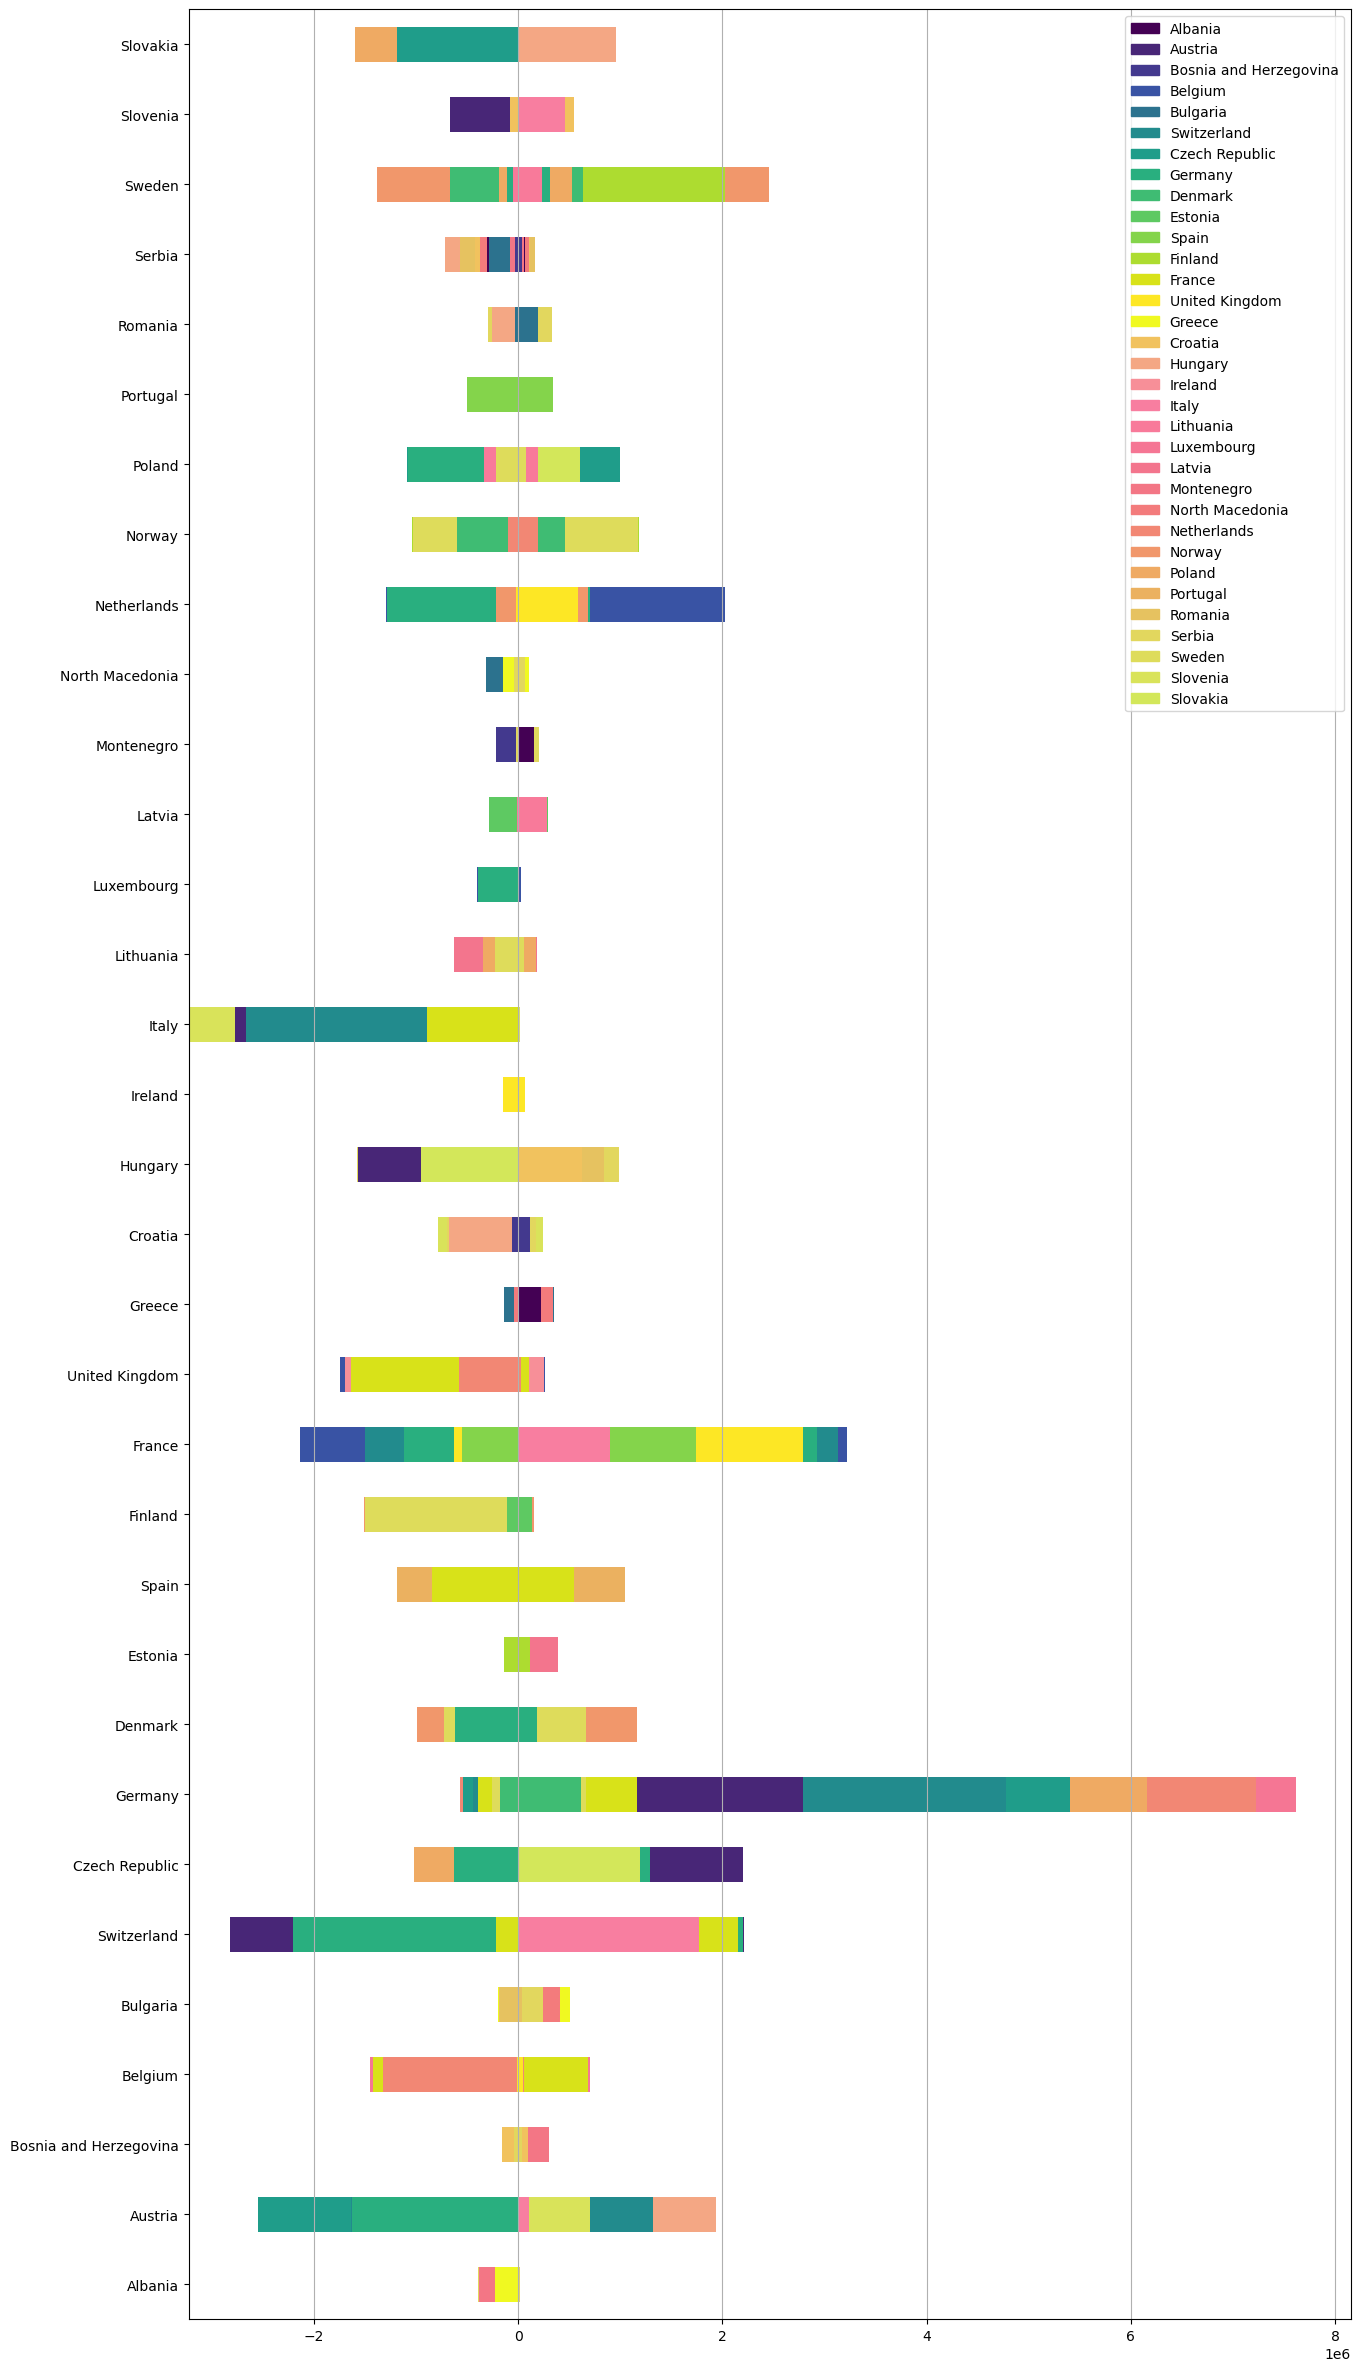

In [270]:
cross_border_bar()

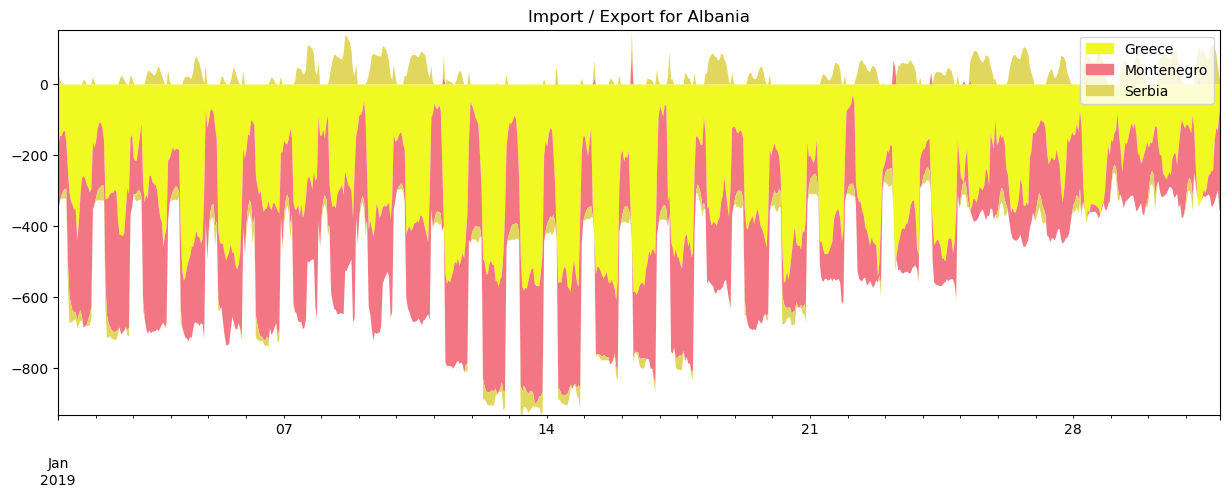

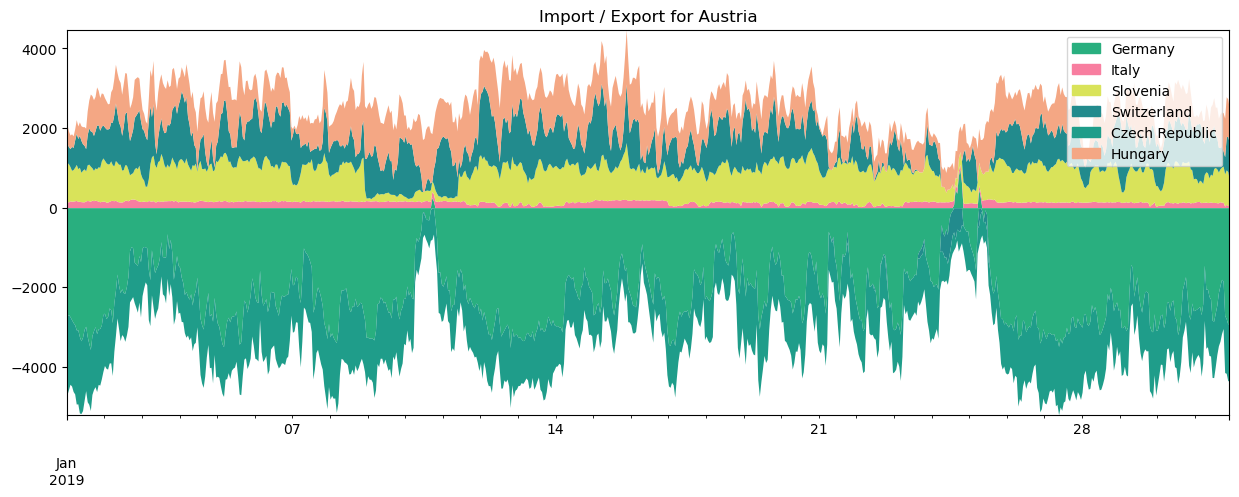

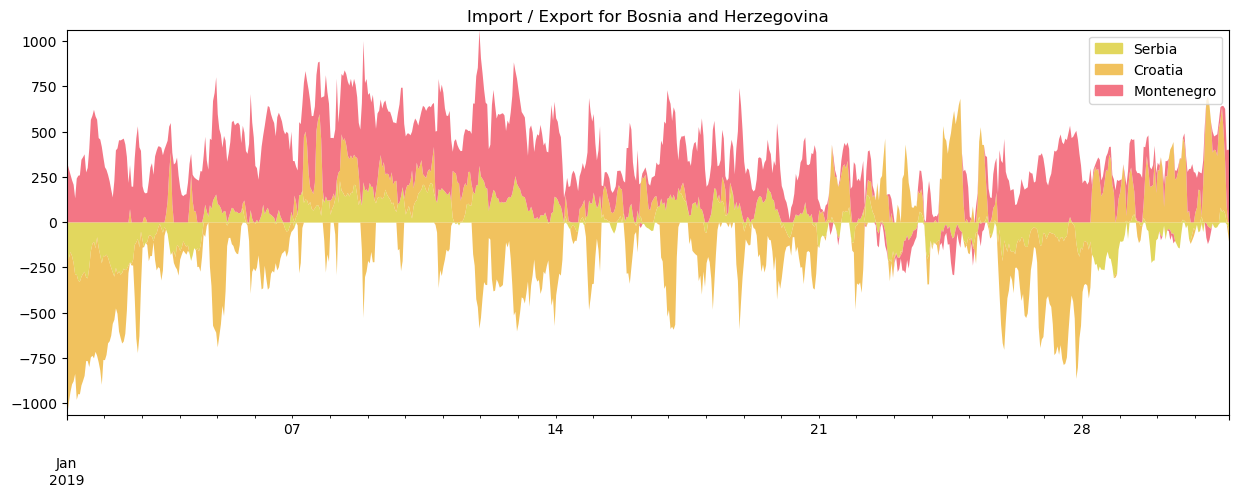

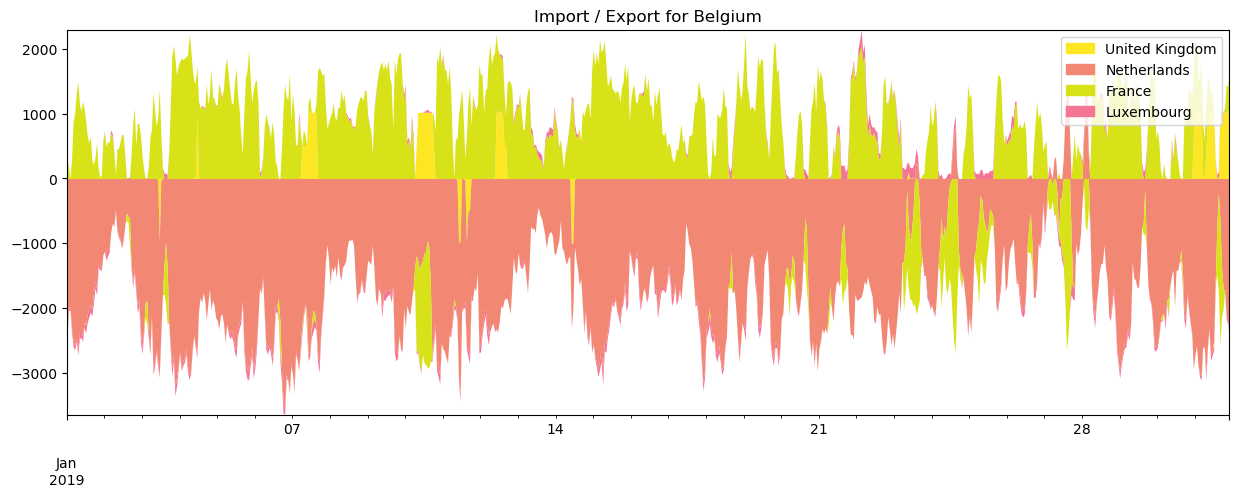

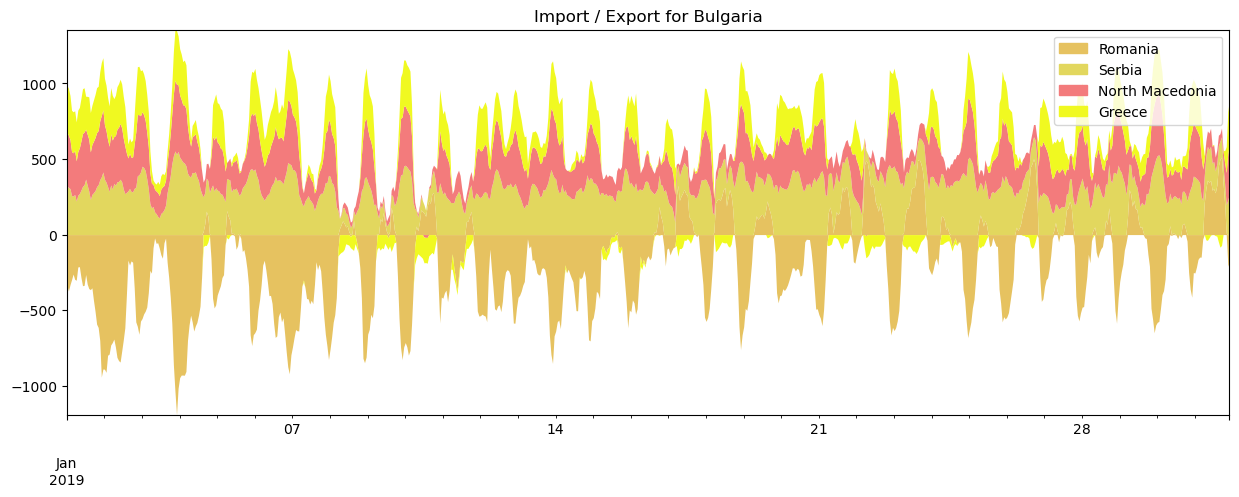

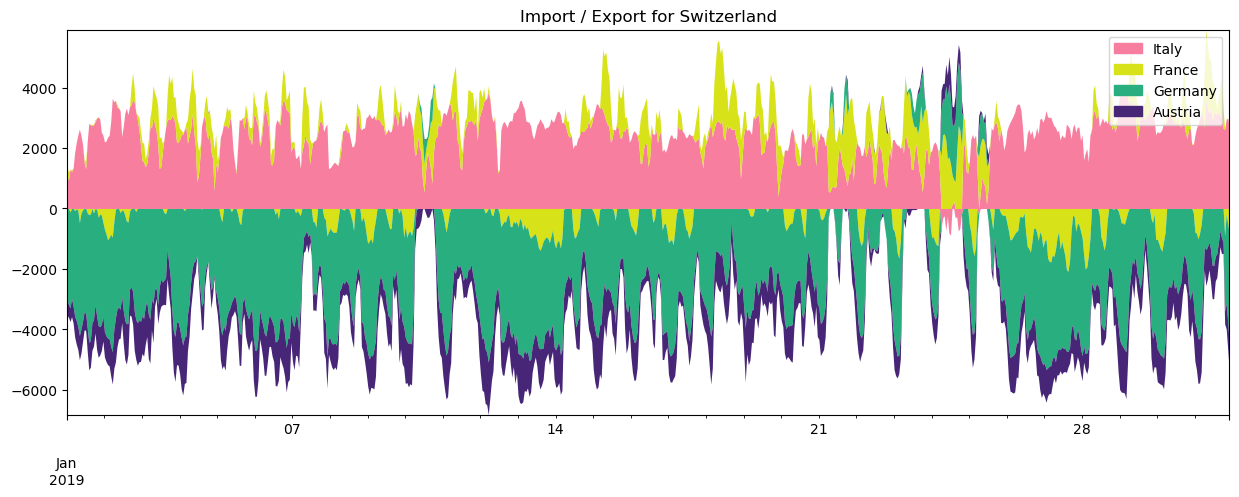

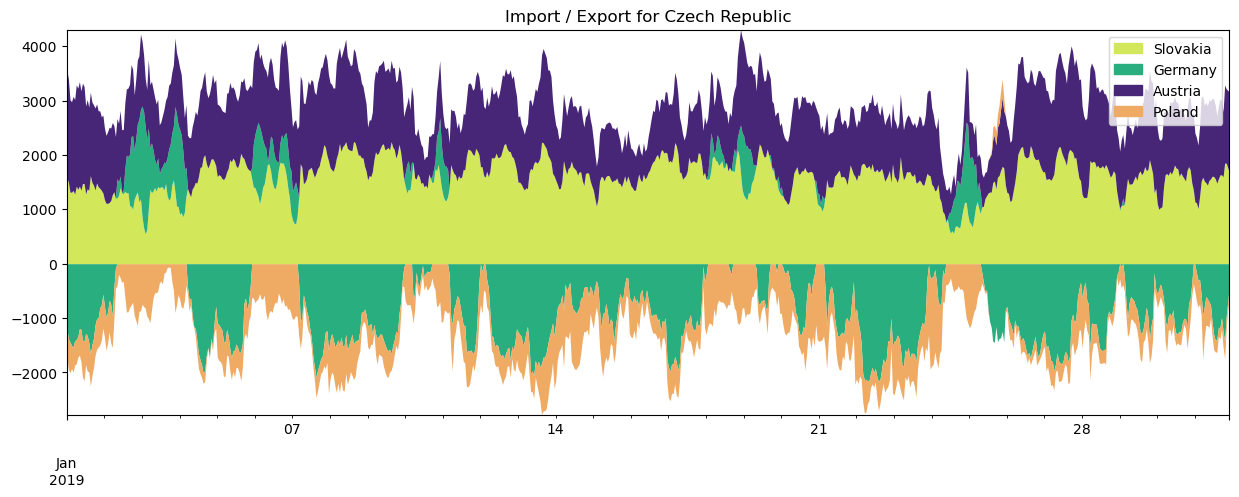

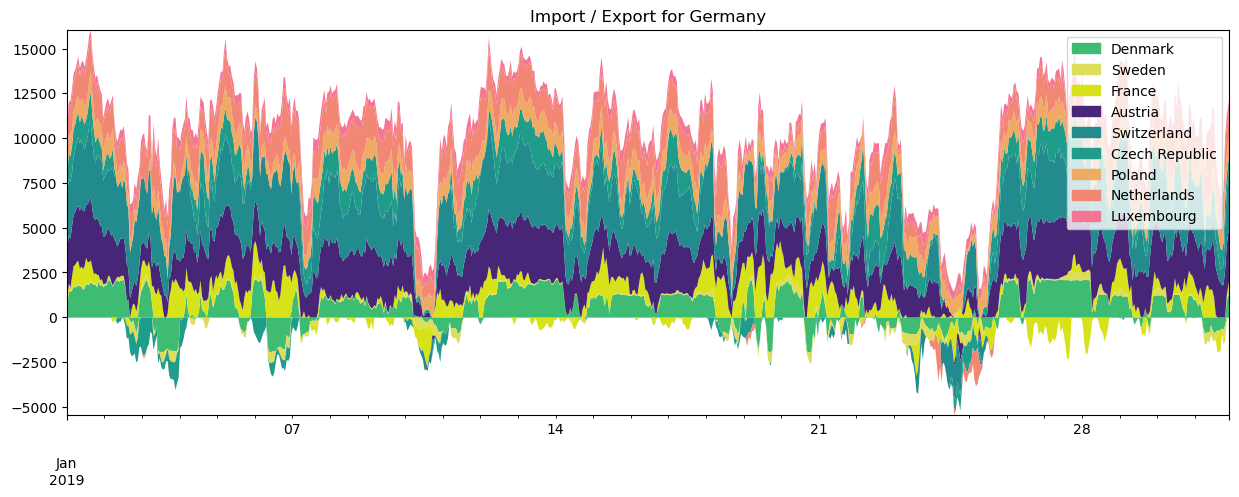

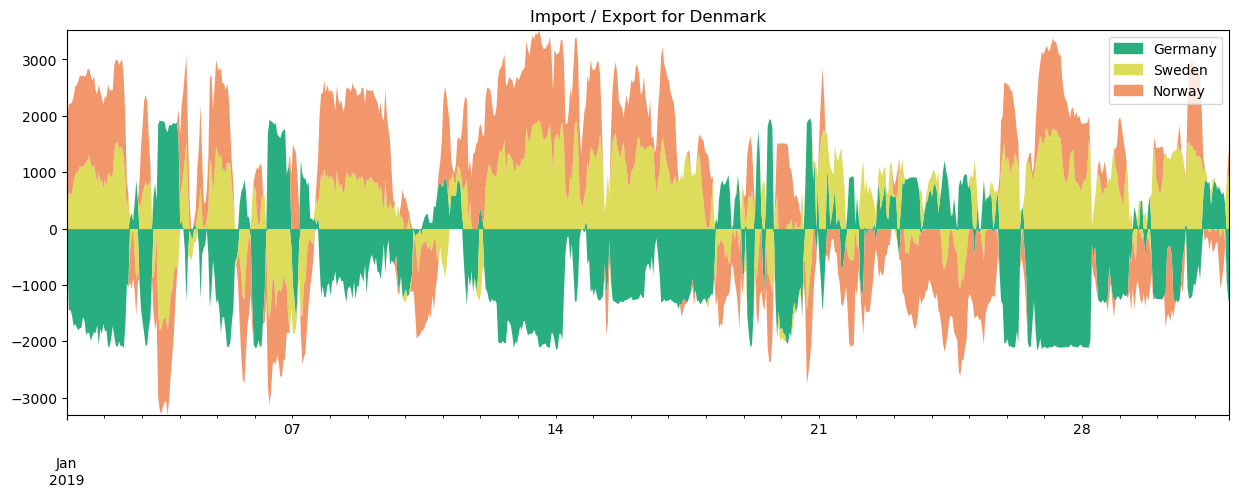

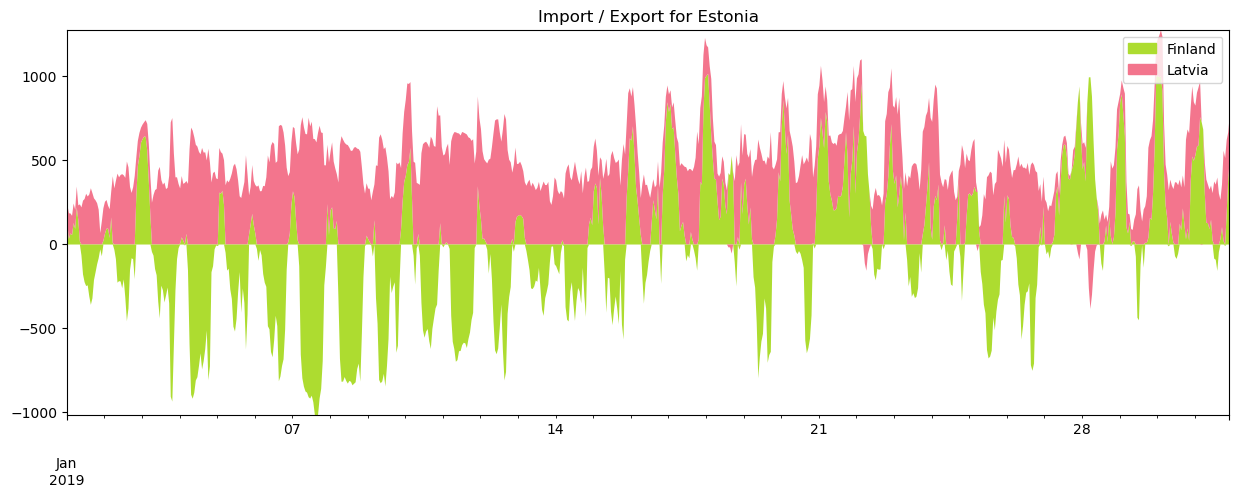

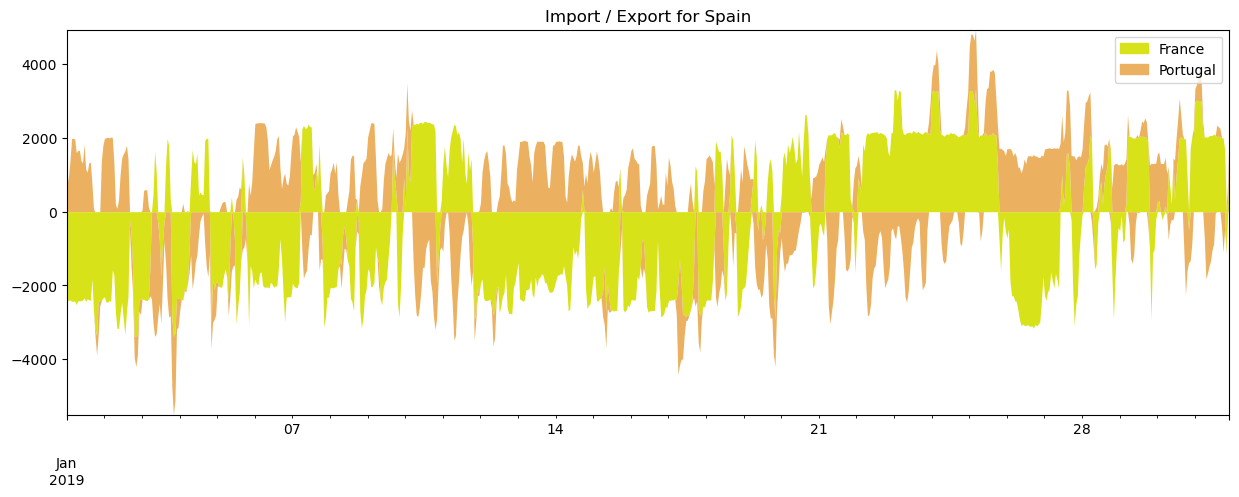

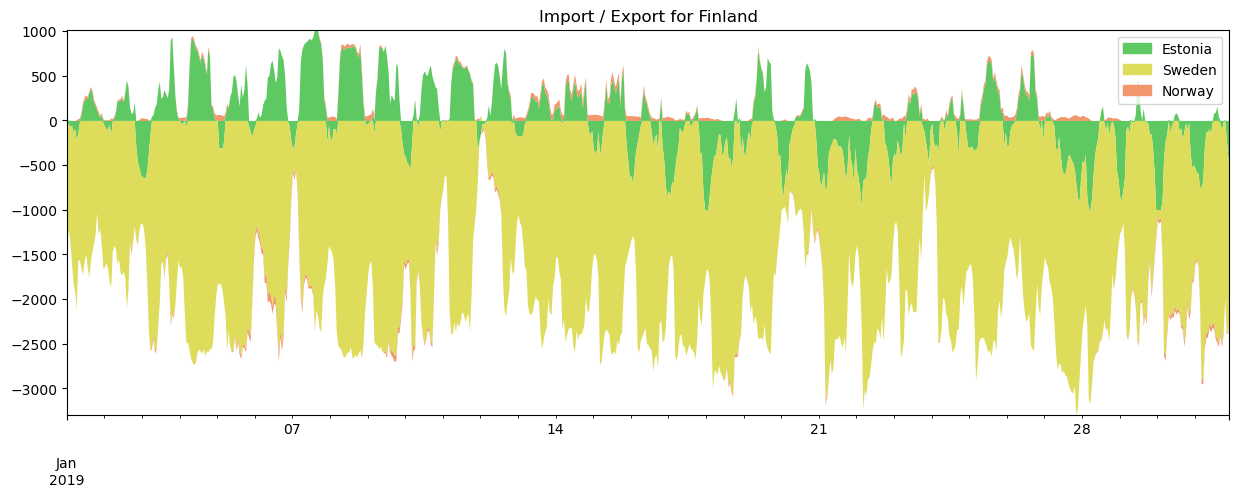

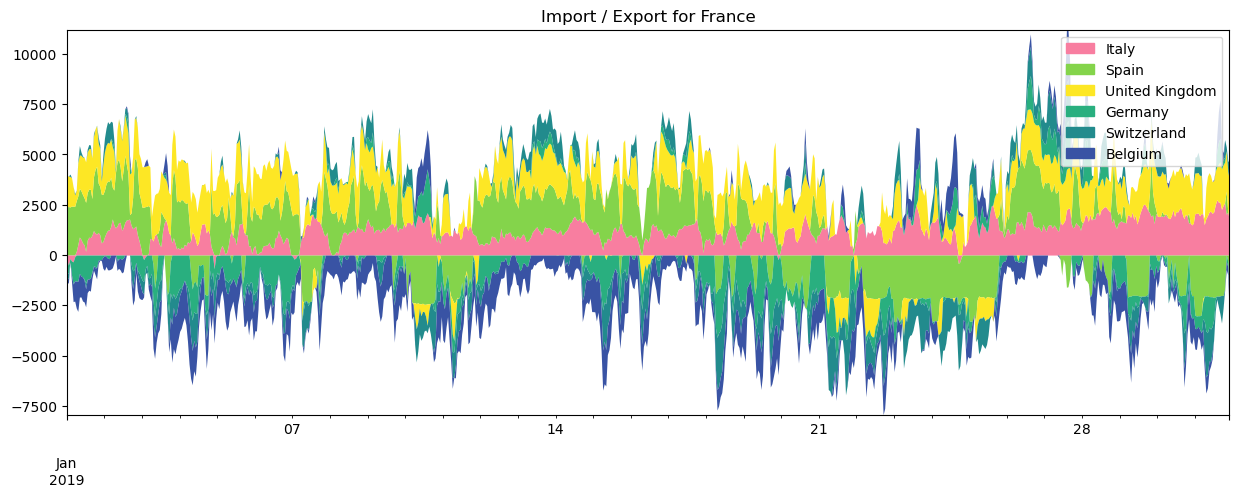

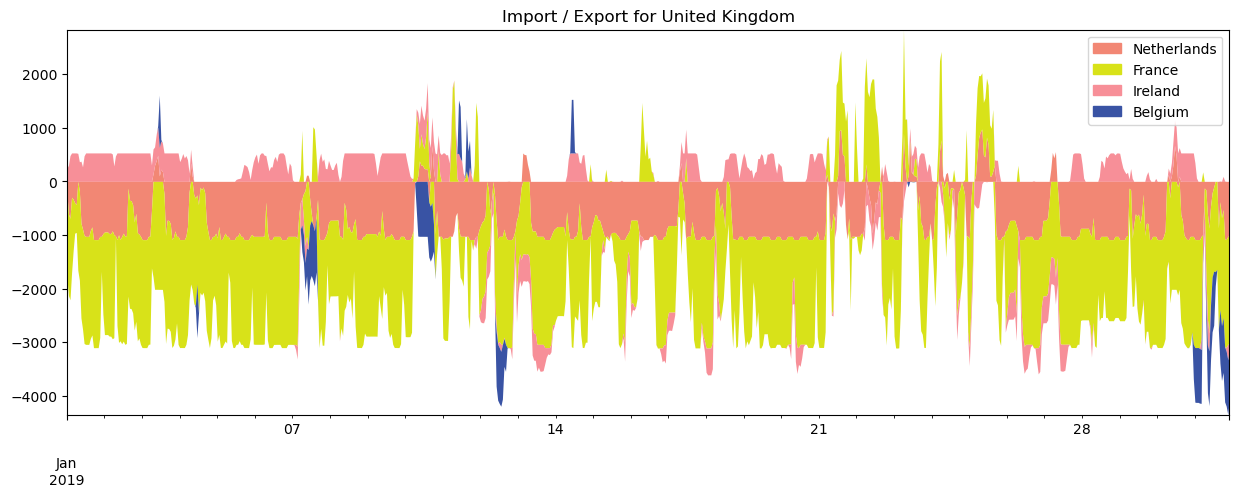

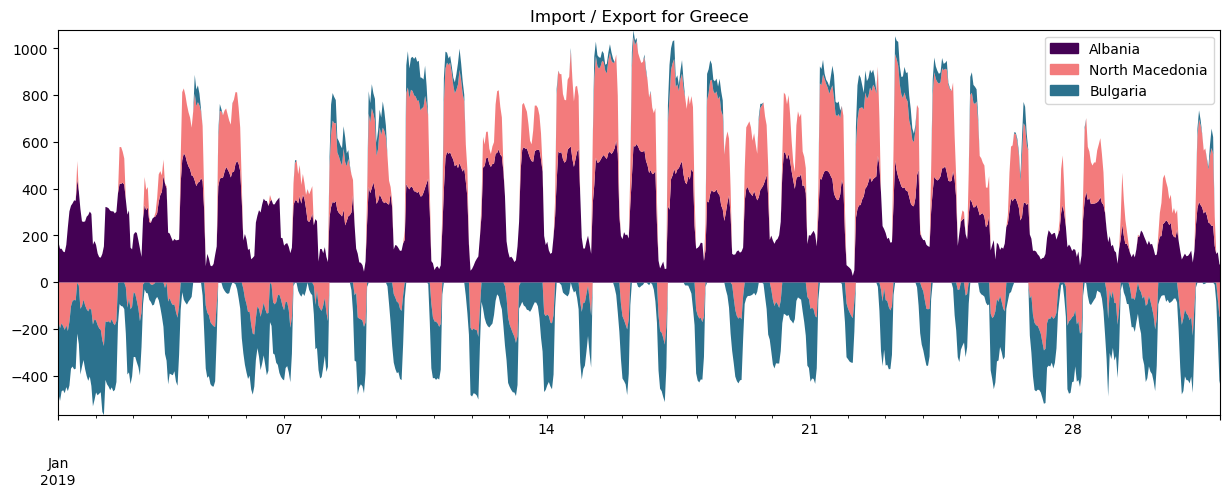

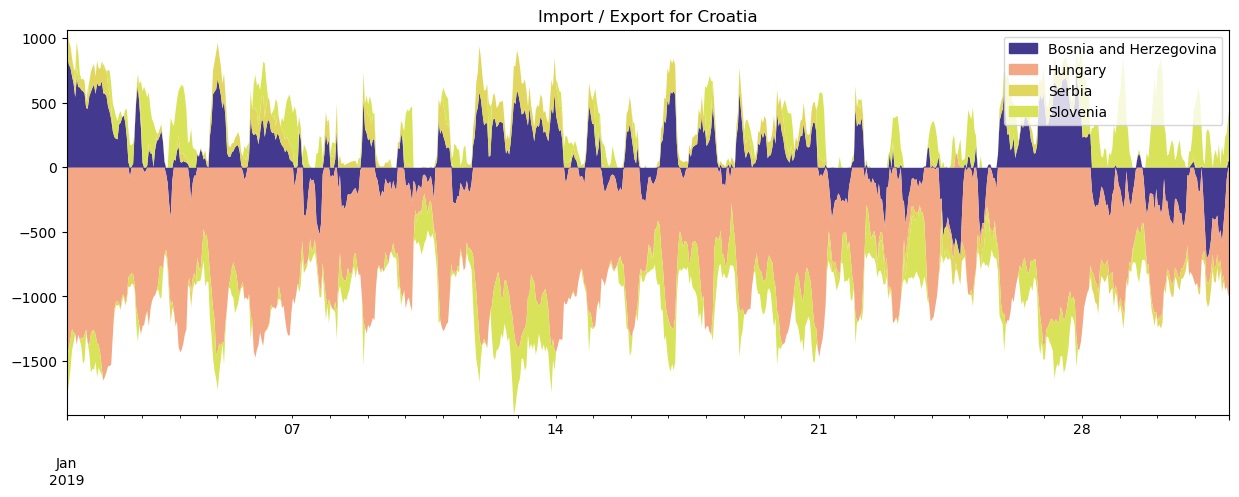

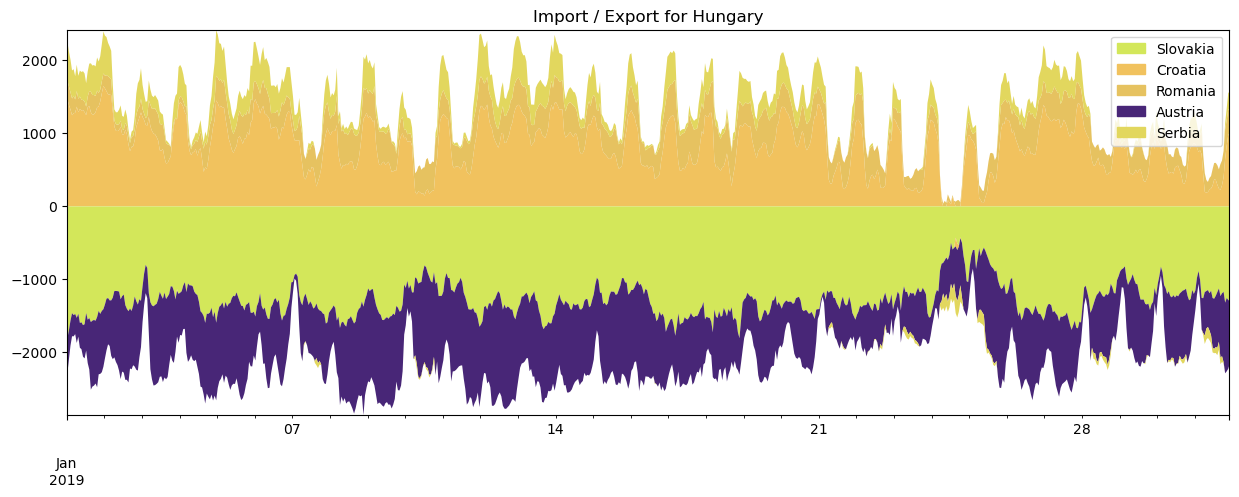

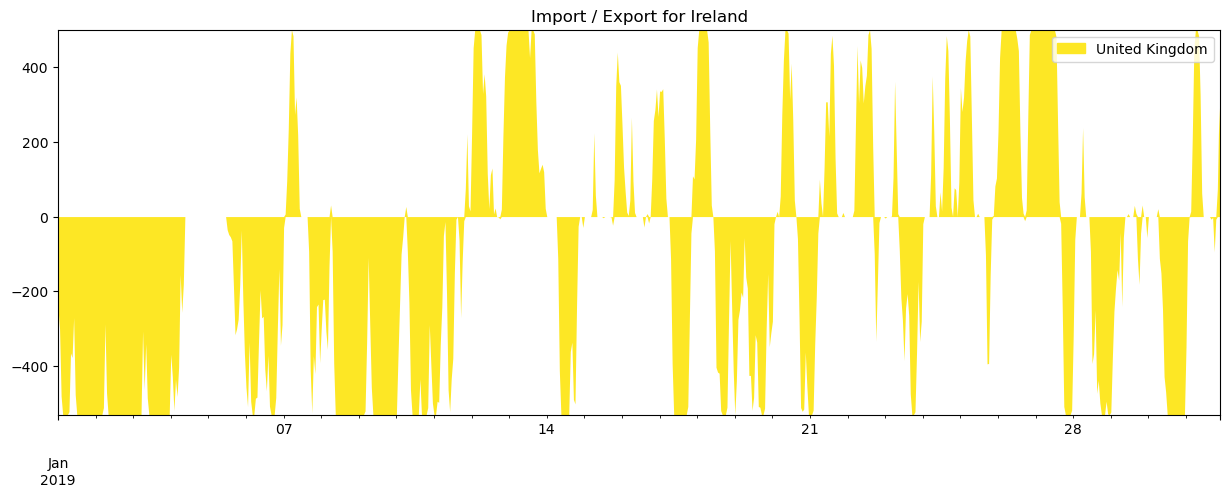

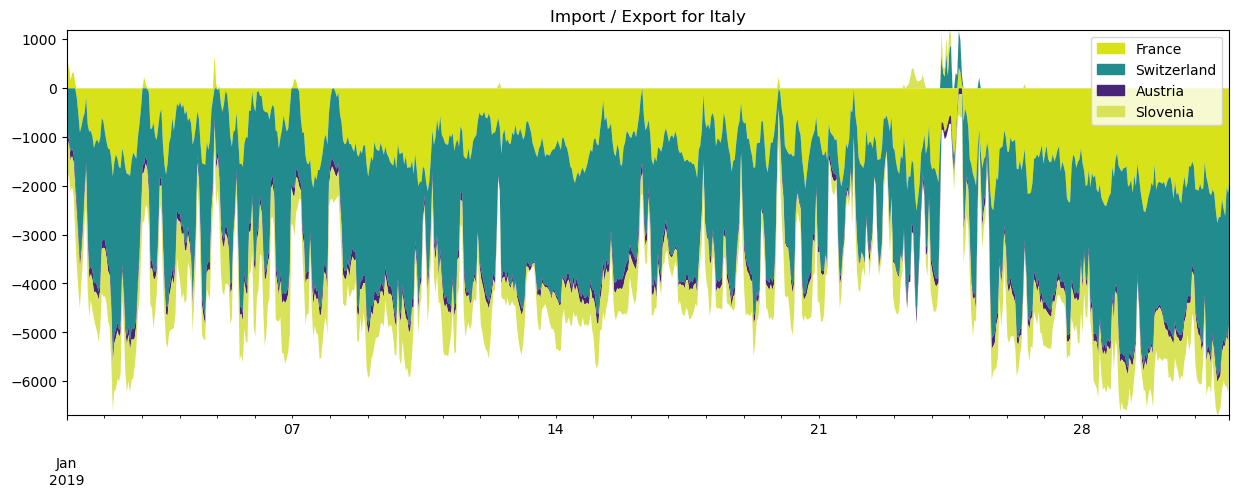

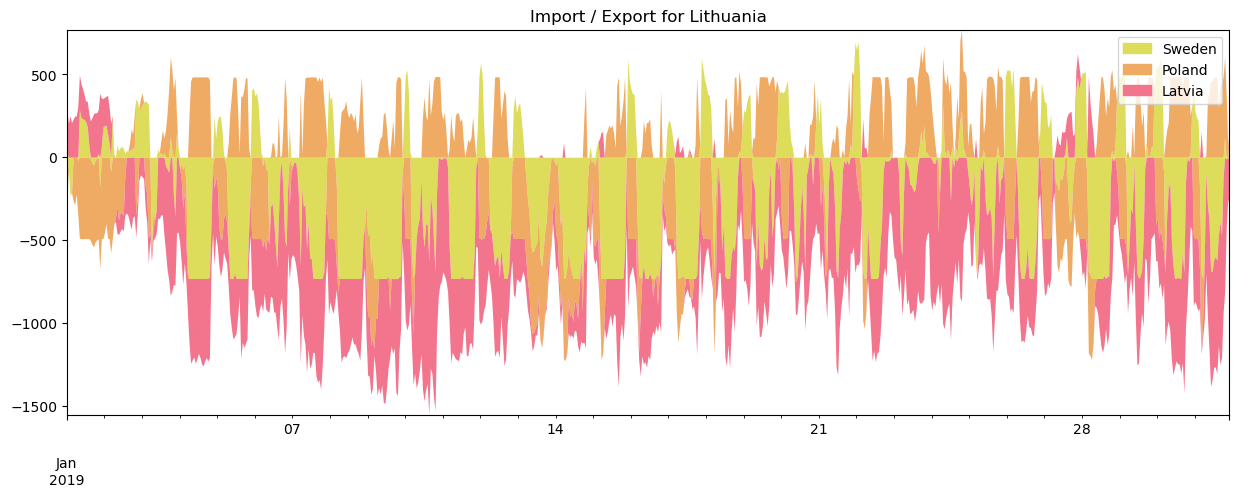

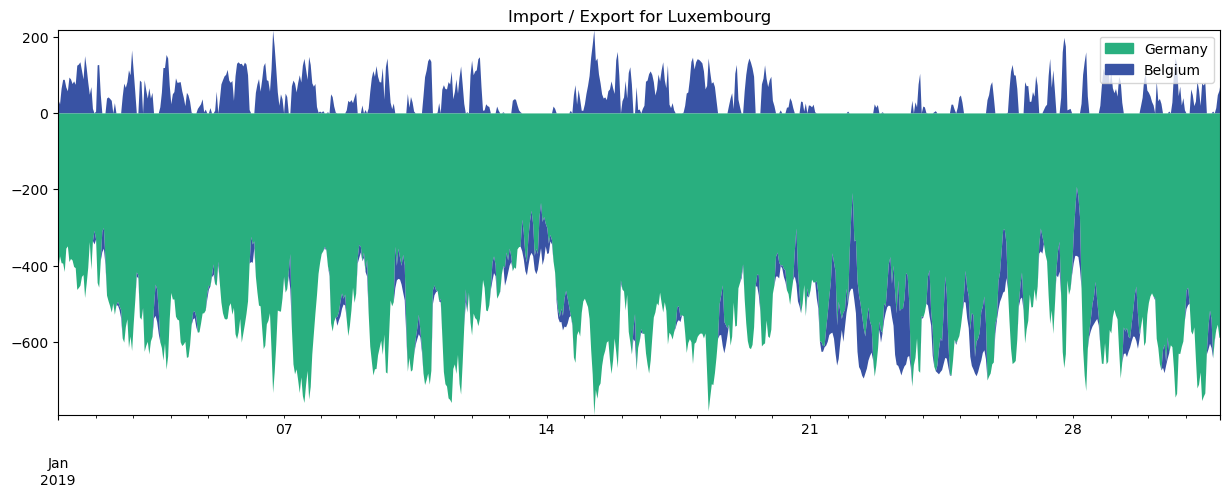

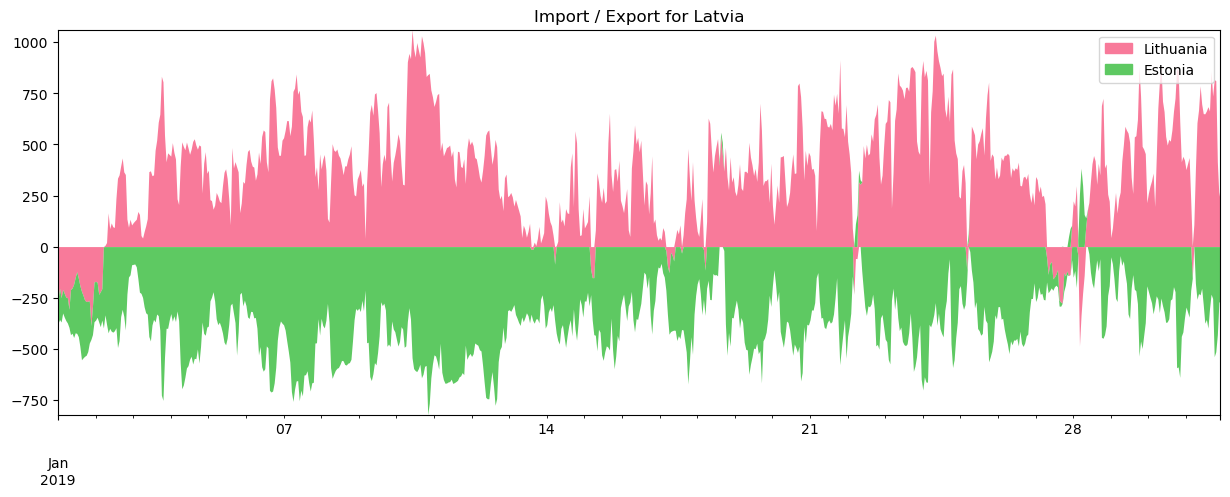

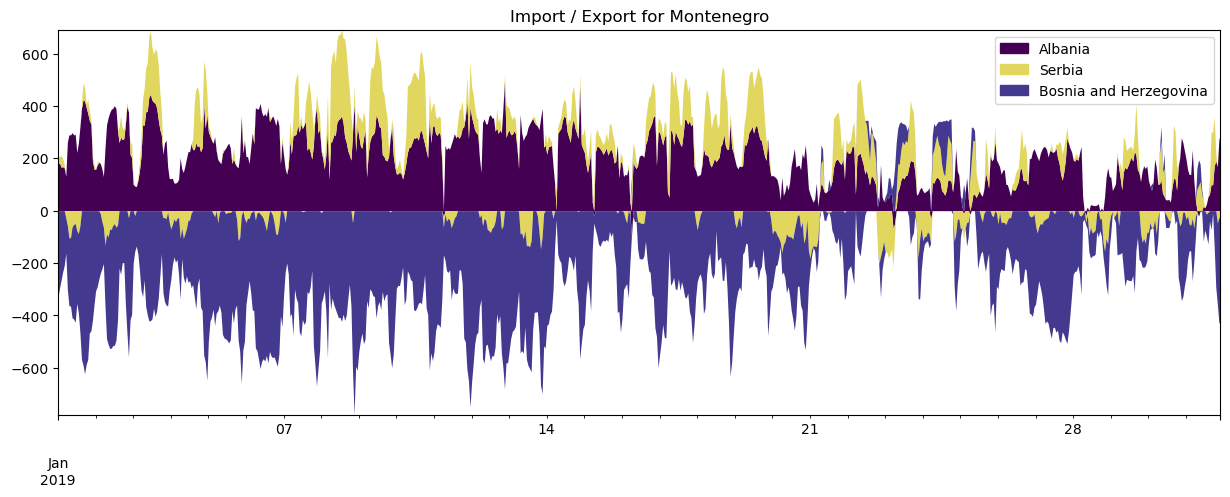

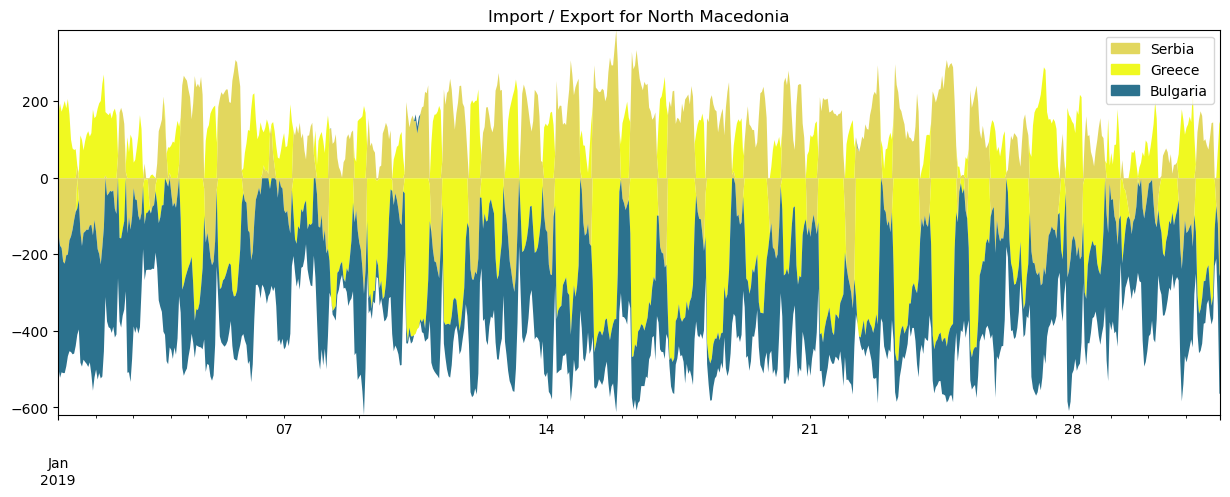

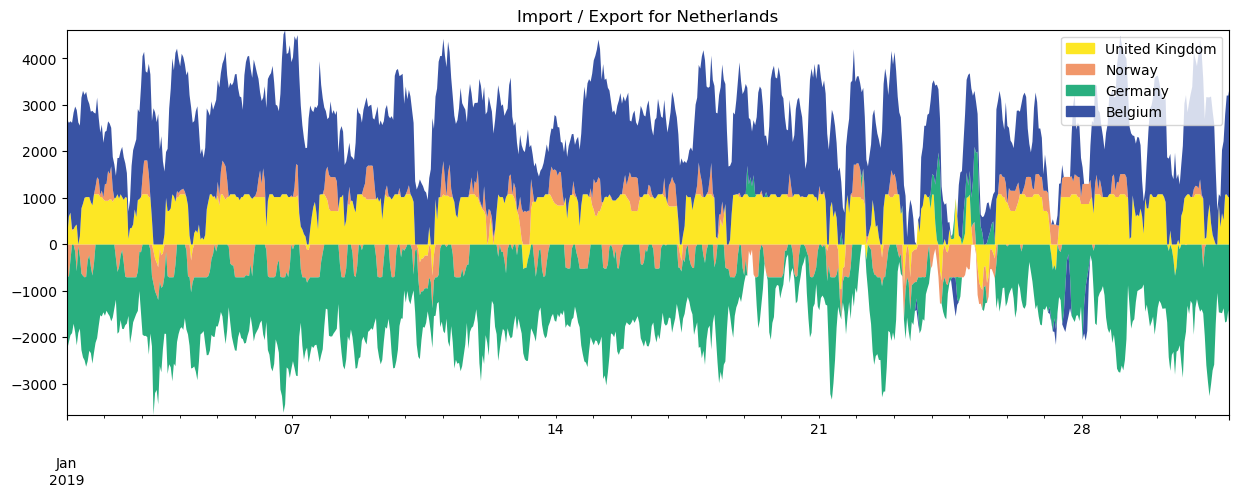

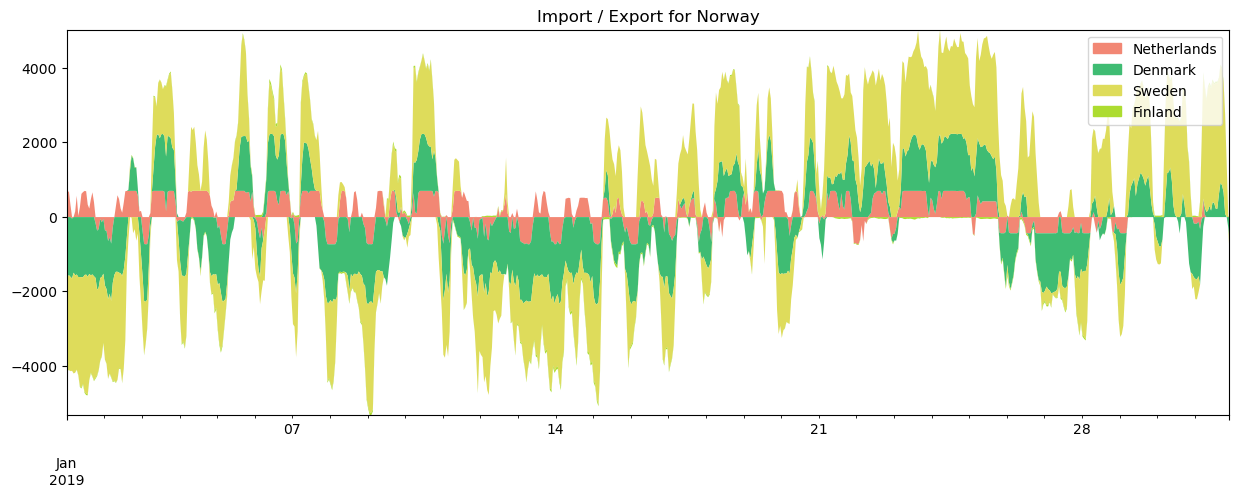

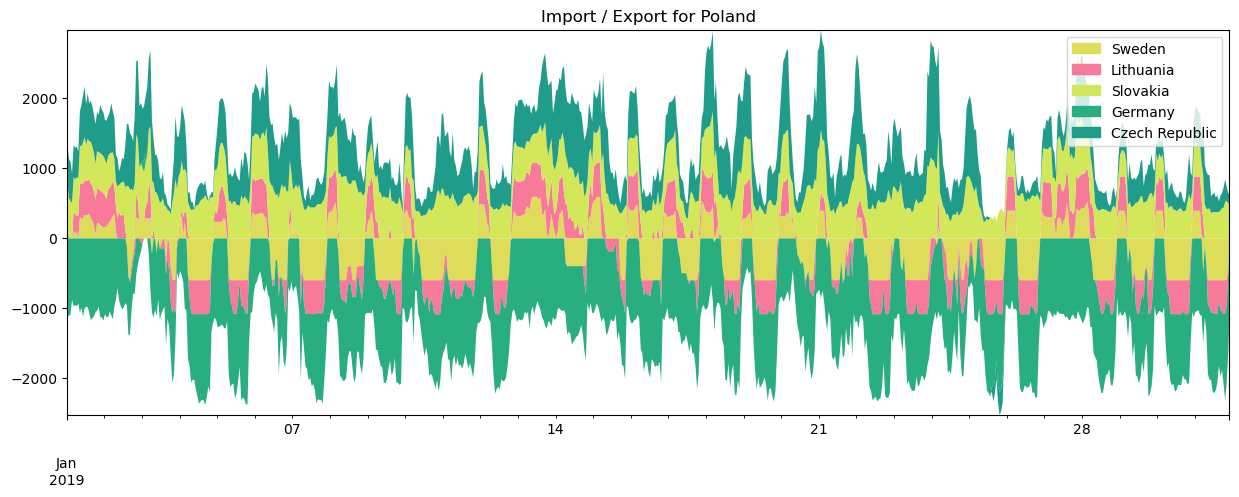

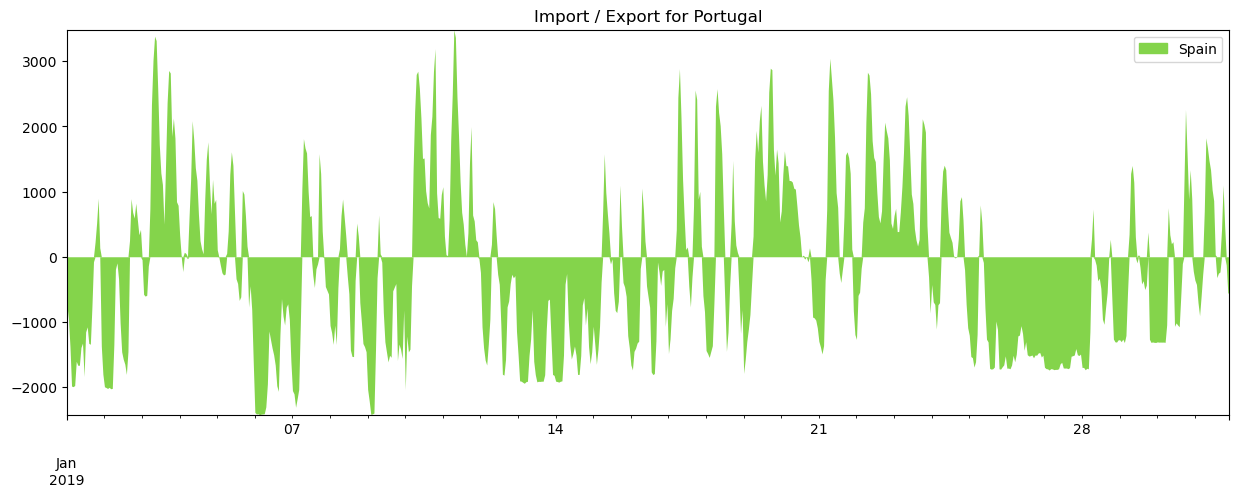

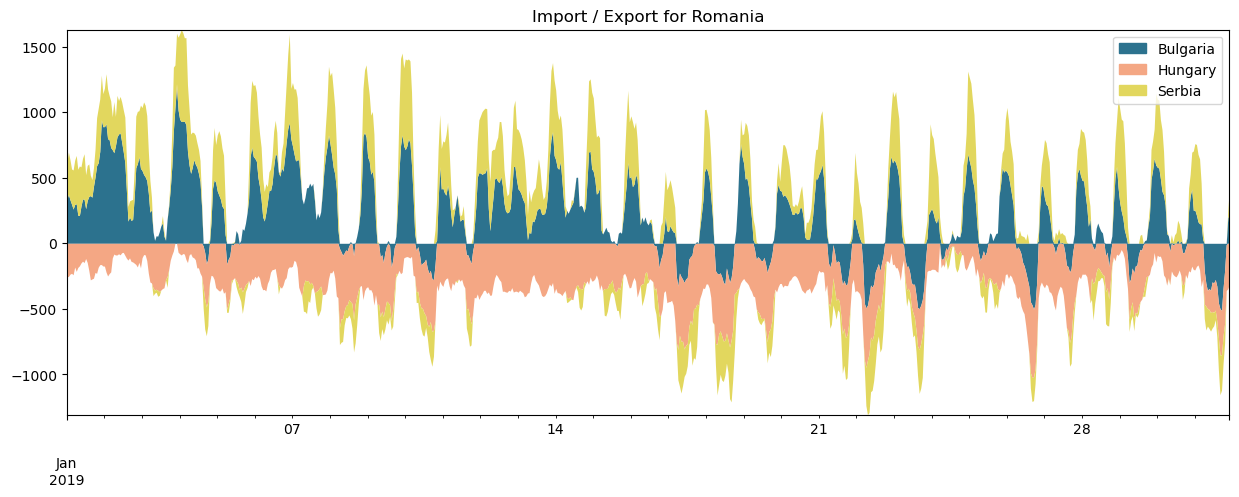

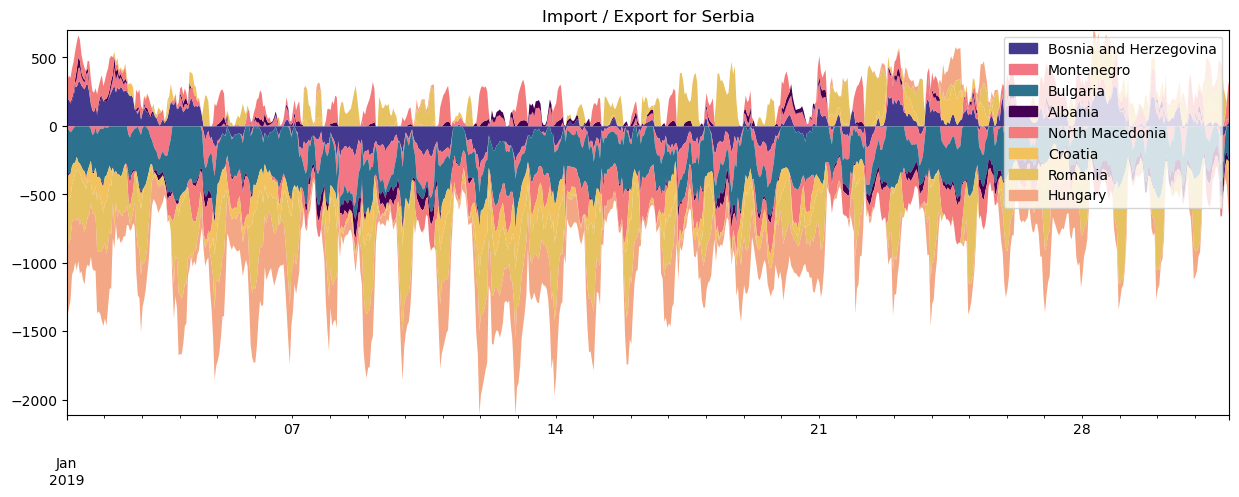

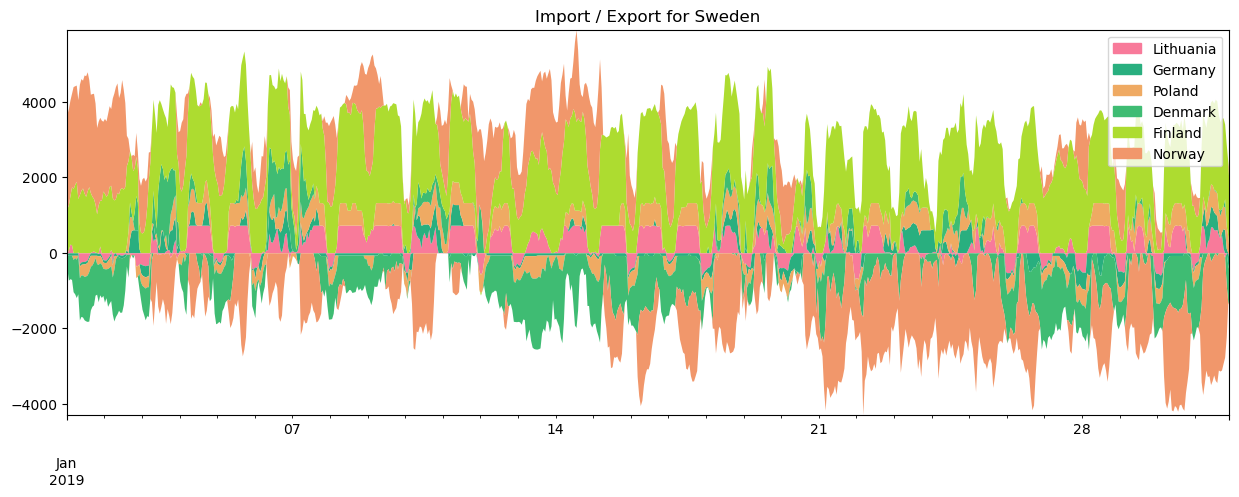

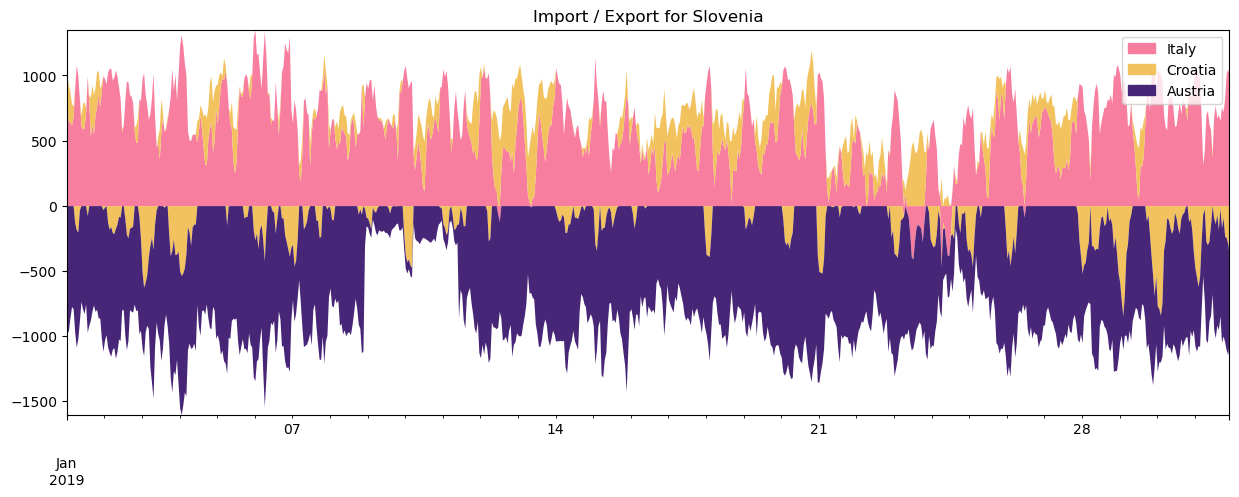

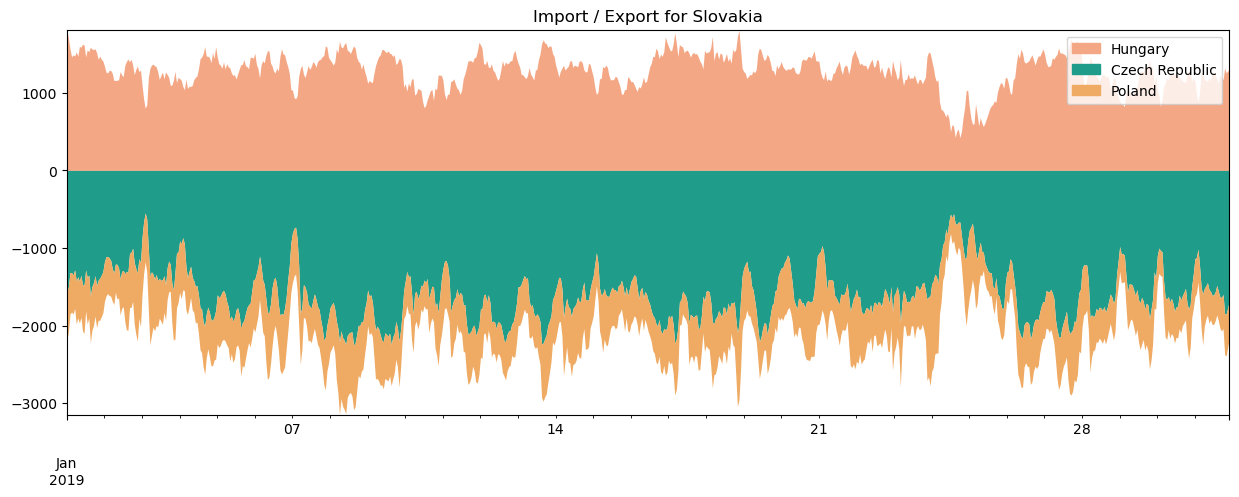

In [280]:
for country in all_country:
    cross_border_time_series(country)